In [ ]:
# pip install opencv-python

In [ ]:
# pip install pillow

In [113]:
import os
import cv2
from PIL import Image
from glob import glob
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [114]:
tf.random.set_seed(0)

In [3]:
def convert_video_to_images(img_folder, filename='assignment3_video.avi'):
    """
    Converts the video file (assignment3_video.avi) to JPEG images.
    Once the video has been converted to images, then this function doesn't
    need to be run again.
    
    Arguments
    ---------
    filename : (string) file name (absolute or relative path) of video file.
    img_folder : (string) folder where the video frames will be
    stored as JPEG images.
    """
    # Make the img_folder if it doesn't exist.'
    try:
        if not os.path.exists(img_folder):
            os.makedirs(img_folder)
    except OSError:
        print('Error')
        
    # Make sure that the abscense/prescence of path
    # separator doesn't throw an error.
    img_folder = f'{img_folder.rstrip(os.path.sep)}{os.path.sep}'
    # Instantiate the video object.
    video = cv2.VideoCapture(filename)
    
    # Check if the video is opened successfully
    if not video.isOpened():
        print("Error opening video file")
    
    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            im_fname = f'{img_folder}frame{i:0>4}.jpg'
            print('Captured...', im_fname)
            cv2.imwrite(im_fname, frame)
            i += 1
        else:
            break

    video.release()
    cv2.destroyAllWindows()

    if i:
        print(f'Video converted\n{i} images written to {img_folder}')

In [4]:
convert_video_to_images('img_folder')

Captured... img_folder\frame0000.jpg
Captured... img_folder\frame0001.jpg
Captured... img_folder\frame0002.jpg
Captured... img_folder\frame0003.jpg
Captured... img_folder\frame0004.jpg
Captured... img_folder\frame0005.jpg
Captured... img_folder\frame0006.jpg
Captured... img_folder\frame0007.jpg
Captured... img_folder\frame0008.jpg
Captured... img_folder\frame0009.jpg
Captured... img_folder\frame0010.jpg
Captured... img_folder\frame0011.jpg
Captured... img_folder\frame0012.jpg
Captured... img_folder\frame0013.jpg
Captured... img_folder\frame0014.jpg
Captured... img_folder\frame0015.jpg
Captured... img_folder\frame0016.jpg
Captured... img_folder\frame0017.jpg
Captured... img_folder\frame0018.jpg
Captured... img_folder\frame0019.jpg
Captured... img_folder\frame0020.jpg
Captured... img_folder\frame0021.jpg
Captured... img_folder\frame0022.jpg
Captured... img_folder\frame0023.jpg
Captured... img_folder\frame0024.jpg
Captured... img_folder\frame0025.jpg
Captured... img_folder\frame0026.jpg
C

Captured... img_folder\frame0272.jpg
Captured... img_folder\frame0273.jpg
Captured... img_folder\frame0274.jpg
Captured... img_folder\frame0275.jpg
Captured... img_folder\frame0276.jpg
Captured... img_folder\frame0277.jpg
Captured... img_folder\frame0278.jpg
Captured... img_folder\frame0279.jpg
Captured... img_folder\frame0280.jpg
Captured... img_folder\frame0281.jpg
Captured... img_folder\frame0282.jpg
Captured... img_folder\frame0283.jpg
Captured... img_folder\frame0284.jpg
Captured... img_folder\frame0285.jpg
Captured... img_folder\frame0286.jpg
Captured... img_folder\frame0287.jpg
Captured... img_folder\frame0288.jpg
Captured... img_folder\frame0289.jpg
Captured... img_folder\frame0290.jpg
Captured... img_folder\frame0291.jpg
Captured... img_folder\frame0292.jpg
Captured... img_folder\frame0293.jpg
Captured... img_folder\frame0294.jpg
Captured... img_folder\frame0295.jpg
Captured... img_folder\frame0296.jpg
Captured... img_folder\frame0297.jpg
Captured... img_folder\frame0298.jpg
C

Captured... img_folder\frame0556.jpg
Captured... img_folder\frame0557.jpg
Captured... img_folder\frame0558.jpg
Captured... img_folder\frame0559.jpg
Captured... img_folder\frame0560.jpg
Captured... img_folder\frame0561.jpg
Captured... img_folder\frame0562.jpg
Captured... img_folder\frame0563.jpg
Captured... img_folder\frame0564.jpg
Captured... img_folder\frame0565.jpg
Captured... img_folder\frame0566.jpg
Captured... img_folder\frame0567.jpg
Captured... img_folder\frame0568.jpg
Captured... img_folder\frame0569.jpg
Captured... img_folder\frame0570.jpg
Captured... img_folder\frame0571.jpg
Captured... img_folder\frame0572.jpg
Captured... img_folder\frame0573.jpg
Captured... img_folder\frame0574.jpg
Captured... img_folder\frame0575.jpg
Captured... img_folder\frame0576.jpg
Captured... img_folder\frame0577.jpg
Captured... img_folder\frame0578.jpg
Captured... img_folder\frame0579.jpg
Captured... img_folder\frame0580.jpg
Captured... img_folder\frame0581.jpg
Captured... img_folder\frame0582.jpg
C

Captured... img_folder\frame0859.jpg
Captured... img_folder\frame0860.jpg
Captured... img_folder\frame0861.jpg
Captured... img_folder\frame0862.jpg
Captured... img_folder\frame0863.jpg
Captured... img_folder\frame0864.jpg
Captured... img_folder\frame0865.jpg
Captured... img_folder\frame0866.jpg
Captured... img_folder\frame0867.jpg
Captured... img_folder\frame0868.jpg
Captured... img_folder\frame0869.jpg
Captured... img_folder\frame0870.jpg
Captured... img_folder\frame0871.jpg
Captured... img_folder\frame0872.jpg
Captured... img_folder\frame0873.jpg
Captured... img_folder\frame0874.jpg
Captured... img_folder\frame0875.jpg
Captured... img_folder\frame0876.jpg
Captured... img_folder\frame0877.jpg
Captured... img_folder\frame0878.jpg
Captured... img_folder\frame0879.jpg
Captured... img_folder\frame0880.jpg
Captured... img_folder\frame0881.jpg
Captured... img_folder\frame0882.jpg
Captured... img_folder\frame0883.jpg
Captured... img_folder\frame0884.jpg
Captured... img_folder\frame0885.jpg
C

In [5]:
def load_images(img_dir, im_width=60, im_height=44):
    """
    Reads, resizes and normalizes the extracted image frames from a folder.
    The images are returned both as a Numpy array of flattened images (i.e. the images with Arguments
    ---------
    img_dir : (string) the directory where the images are stored.
    im_width : (int) The desired width of the image.
    The default value works well.
    im_height : (int) The desired height of the image.
    The default value works well.
    Returns
    X : (numpy.array) An array of the flattened images.
    images : (list) A list of the resized images.
    """
    images = []
    fnames = glob(f'{img_dir}{os.path.sep}frame*.jpg')
    fnames.sort()
    
    for fname in fnames:
        im = Image.open(fname)
        # resize the image to im_width and im_height.
        im_array = np.array(im.resize((im_width, im_height)))
        # Convert uint8 to decimal and normalize to 0 - 1.
        images.append(im_array.astype(np.float32) / 255.)
        # Close the PIL image once converted and stored.
        im.close()
        
    # Flatten the images to a single vector
    X = np.array(images).reshape(-1, np.prod(images[0].shape))
    
    return X, images

In [12]:
input_img = keras.Input(shape=(44, 60, 3))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# pip install -U scikit-learn

In [115]:
X, images = load_images('img_folder')

X_train, X_test, _, _ = train_test_split(X, images, train_size=0.65, random_state=1, shuffle=False)

X_train = np.reshape(X_train, (len(X_train), 44, 60, 3))
X_test = np.reshape(X_test, (len(X_test), 44, 60, 3))

In [116]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/100
11/11 [==============================] - 4s 299ms/step - loss: 0.5136 - val_loss: 0.5195
Epoch 2/100
11/11 [==============================] - 3s 299ms/step - loss: 0.5136 - val_loss: 0.5193
Epoch 3/100
11/11 [==============================] - 3s 284ms/step - loss: 0.5135 - val_loss: 0.5194
Epoch 4/100
11/11 [==============================] - 3s 300ms/step - loss: 0.5136 - val_loss: 0.5193
Epoch 5/100
11/11 [==============================] - 3s 268ms/step - loss: 0.5135 - val_loss: 0.5193
Epoch 6/100
11/11 [==============================] - 3s 278ms/step - loss: 0.5135 - val_loss: 0.5194
Epoch 7/100
11/11 [==============================] - 3s 272ms/step - loss: 0.5135 - val_loss: 0.5194
Epoch 8/100
11/11 [==============================] - 3s 276ms/step - loss: 0.5135 - val_loss: 0.5193
Epoch 9/100
11/11 [==============================] - 3s 272ms/step - loss: 0.5135 - val_loss: 0.5194
Epoch 10/100
11/11 [==============================] - 3s 259ms/step - loss: 0.5135 - val_lo

In [98]:
losses = []
for frame in images:
    frame = frame.reshape((1, 44, 60, 3))
    loss = autoencoder.evaluate(frame, frame, verbose=0)
    losses.append(loss)

In [50]:
# pip install -U matplotlib

                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB ? eta -:--:--
                                              0.0/7.5 MB 487.6 kB/s eta 0:00:16
     --                                       0.5/7.5 MB 4.0 MB/s eta 0:00:02
     -------                                  1.3/7.5 MB 8.5 MB/s eta 0:00:01
     -----------                              2.2/7.5 MB 11.0 MB/s eta 0:00:01
     ----------------                         3.1/7.5 MB 12.5 MB/s eta 0:00:01
     --------------------                     3.9/7.5 MB 12.9 MB/s eta 0:00:01
     -------------------------                4.8/7.5 MB 13.8 MB/s eta 0:00:01
     ------------------------------           5.7/7.5 MB 15.1 MB/s eta 0:00:01
     ----------------------------------       6.5/7.5 MB 15.5 MB/s eta 0:00:01
     ---------------------------------------  7.5/7.5 MB 15.9 MB/s eta 0:00:01
     ---------------------------------------- 7.5/7.5 MB 14.5 MB/s et

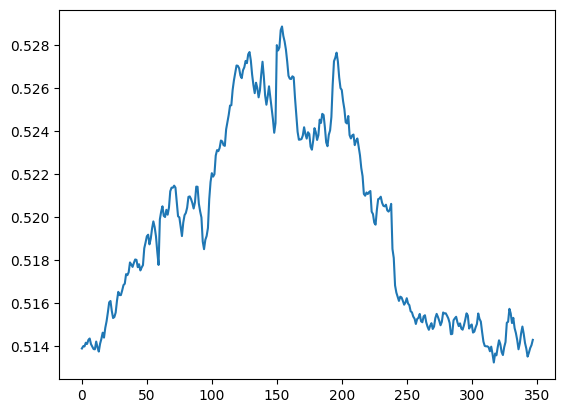

In [117]:
plt.plot(losses[702:])
plt.show()

In [100]:
def predict(frame):
    """
    Argument
    --------
    frame : Video frame with shape == (44, 60, 3) and dtype == float.
    
    Return
    anomaly : A boolean indicating whether the frame is an anomaly or not.
    ------
    """
    frame = frame.reshape((1, 44, 60, 3))
    loss = autoencoder.evaluate(frame, frame, verbose=0)
    anomaly = loss > 0.516
    return anomaly

In [109]:
predict(images[729])

True

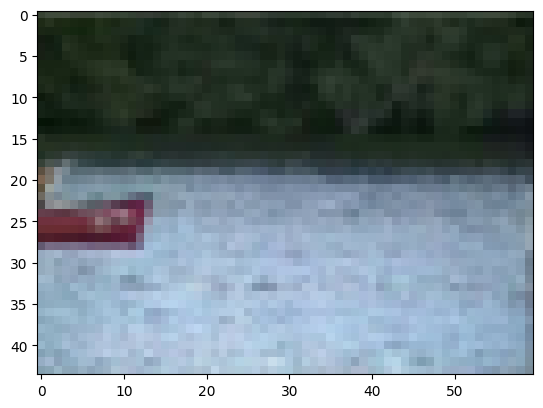

In [110]:
plt.imshow(images[729])
plt.show()

In [111]:
predict(images[500])

False

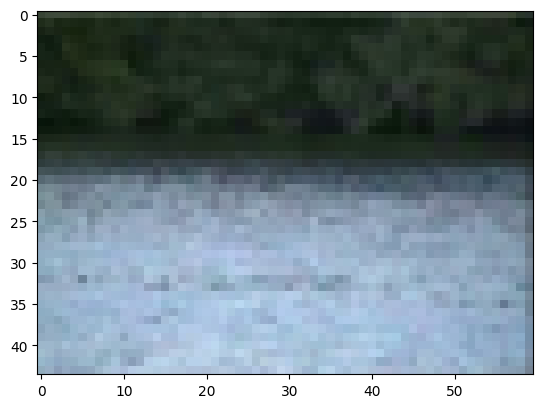

In [112]:
plt.imshow(images[500])
plt.show()